The following notebook contains all the code necessary to produce the panels presented in __Figure 2 and Figure S3 of Beadling et al., 2024: From the surface to the stratosphere: large-scale atmospheric response to Antarctic meltwater__. To run the code locally, one will need to download the model fields from the associated Zenodo archive and the ESM4 / CM4 CMIP6 preindustrial control output provided through the Earth System Grid Federation (ESGF) (Guo et al., 2018; Krasting et al., 2018):

> Guo, H., and Coauthors, 2018: NOAA-GFDL GFDL-CM4 model output piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8666.

> Krasting, J. P., and Coauthors, 2018a: NOAA-GFDL GFDL-ESM4 model output prepared for CMIP6 CMIP piControl. Earth System Grid Federation. [Dataset] https://doi.org/10.22033/ESGF/CMIP6.8669.

Please contact rebecca.beadling@temple.edu for questions related to the analysis and use of the datasets provided.

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cmocean
import cartopy.crs as ccrs
import numpy as np
import momlevel as ml
import zarr

xr.set_options(display_style='html')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = 12,6   #default figure size

### Load datasets needed for assessment. The piControl field is sliced to only load the corresponding years that overlap with the experiments.

In [2]:
## zonal wind velocity
cm4_ant1_u = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_u = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_u = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_u = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_u = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_u = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))

In [3]:
## zonal wind velocity
esm4_ant1_u = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_u = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_u = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_u = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_u = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                use_cftime=True, combine = 'by_coords')
esm4_piC_u = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.ucomp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [2]:
## atmospheric temperature
cm4_ant1_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))

In [3]:
## atmospheric temperature
esm4_ant1_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_temp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_temp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.temp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [4]:
## atmospheric temperature tendency due to dynamics
esm4_ant1_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant2_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant3_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant4_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_ant5_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
esm4_piC_tdt_dyn = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))

In [5]:
## atmospheric temperature tendency due to dynamics
cm4_ant1_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant2_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant3_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant4_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_ant5_tdt_dyn = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                 use_cftime=True, combine = 'by_coords')
cm4_piC_tdt_dyn = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/atmos_level/ts/monthly/5yr/*.tdt_dyn.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))

In [6]:
## model diagnosed tropopause air pressure (Pa)
cm4_ant1_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
cm4_ant2_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_290/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
cm4_ant3_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_332/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
cm4_ant4_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_369/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
cm4_ant5_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/xanadu_om4_v1.0.5/CM4_piControl_C_fafantwater_424/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
cm4_piC_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/CM4/warsaw_201710_om4_v1.0.1/CM4_piControl_C/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0251-01-16','0494-12-16'))*0.01

In [7]:
## model diagnosed tropopause air pressure (Pa)
esm4_ant1_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant2_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_151/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant3_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_201/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant4_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_251/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_ant5_ptp = xr.open_mfdataset('/archive/Rebecca.Beadling/FMS2019.01.03_mom6_ESM4_v1.0.3_debug/ESM4_piControl_D_fafantwater_301/gfdl.ncrc4-intel18-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                 use_cftime=True, combine = 'by_coords')*0.01
esm4_piC_ptp = xr.open_mfdataset('/archive/oar.gfdl.cmip6/ESM4/DECK/ESM4_piControl_D/gfdl.ncrc4-intel16-prod-openmp/pp/aerosol_cmip/ts/monthly/5yr/*.ptp.nc',
                                use_cftime=True, combine = 'by_coords').sel(time=slice('0101-01-16','0370-12-16'))*0.01

### For the temperature and ptp fields, create time average of last 20 years of the perturbation experiments and load piControl into memory. Create ensemble means.

In [8]:
esm4_ant1_ptp_last20 = esm4_ant1_ptp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_ptp_last20 = esm4_ant2_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_ptp_last20 = esm4_ant3_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_ptp_last20 = esm4_ant4_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_ptp_last20 = esm4_ant5_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_ptp_ave = esm4_piC_ptp.mean(dim='time').load()

In [9]:
esm4_ant_ptp_ens = xr.concat([esm4_ant1_ptp_last20,
                         esm4_ant2_ptp_last20,
                         esm4_ant3_ptp_last20,
                         esm4_ant4_ptp_last20,
                         esm4_ant5_ptp_last20],dim='member')
esm4_ant_ptp_ens_ave = esm4_ant_ptp_ens.mean(dim='member')

In [10]:
cm4_ant1_ptp_last20 = cm4_ant1_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant2_ptp_last20 = cm4_ant2_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant3_ptp_last20 = cm4_ant3_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant4_ptp_last20 = cm4_ant4_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant5_ptp_last20 = cm4_ant5_ptp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_piC_ptp_ave = cm4_piC_ptp.mean(dim='time').load()

In [11]:
cm4_ant_ptp_ens = xr.concat([cm4_ant1_ptp_last20,
                         cm4_ant2_ptp_last20,
                         cm4_ant3_ptp_last20,
                         cm4_ant4_ptp_last20,
                         cm4_ant5_ptp_last20],dim='member')
cm4_ant_ptp_ens_ave = cm4_ant_ptp_ens.mean(dim='member')

In [6]:
cm4_ant1_temp_last20 = cm4_ant1_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant2_temp_last20 = cm4_ant2_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant3_temp_last20 = cm4_ant3_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant4_temp_last20 = cm4_ant4_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant5_temp_last20 = cm4_ant5_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_piC_temp_ave = cm4_piC_temp.mean(dim='time').load()

In [7]:
esm4_ant1_temp_last20 = esm4_ant1_temp.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_temp_last20 = esm4_ant2_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_temp_last20 = esm4_ant3_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_temp_last20 = esm4_ant4_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_temp_last20 = esm4_ant5_temp.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_temp_ave = esm4_piC_temp.mean(dim='time').load()

In [8]:
cm4_ant_temp_ens = xr.concat([cm4_ant1_temp_last20,
                         cm4_ant2_temp_last20,
                         cm4_ant3_temp_last20,
                         cm4_ant4_temp_last20,
                         cm4_ant5_temp_last20],dim='member')
cm4_ant_temp_ens_ave = cm4_ant_temp_ens.mean(dim='member')

In [9]:
esm4_ant_temp_ens = xr.concat([esm4_ant1_temp_last20,
                         esm4_ant2_temp_last20,
                         esm4_ant3_temp_last20,
                         esm4_ant4_temp_last20,
                         esm4_ant5_temp_last20],dim='member')
esm4_ant_temp_ens_ave = esm4_ant_temp_ens.mean(dim='member')

### Calculate the differences relative to the piControl time-average

In [10]:
cm4_diff_temp_ant1 = cm4_ant1_temp_last20 - cm4_piC_temp_ave
cm4_diff_temp_ant2 = cm4_ant2_temp_last20 - cm4_piC_temp_ave
cm4_diff_temp_ant3 = cm4_ant3_temp_last20 - cm4_piC_temp_ave
cm4_diff_temp_ant4 = cm4_ant4_temp_last20 - cm4_piC_temp_ave
cm4_diff_temp_ant5 = cm4_ant5_temp_last20 - cm4_piC_temp_ave
cm4_diff_temp_ens = cm4_ant_temp_ens_ave - cm4_piC_temp_ave

In [11]:
esm4_diff_temp_ant1 = esm4_ant1_temp_last20 - esm4_piC_temp_ave
esm4_diff_temp_ant2 = esm4_ant2_temp_last20 - esm4_piC_temp_ave
esm4_diff_temp_ant3 = esm4_ant3_temp_last20 - esm4_piC_temp_ave
esm4_diff_temp_ant4 = esm4_ant4_temp_last20 - esm4_piC_temp_ave
esm4_diff_temp_ant5 = esm4_ant5_temp_last20 - esm4_piC_temp_ave
esm4_diff_temp_ens = esm4_ant_temp_ens_ave - esm4_piC_temp_ave

### Compute the zonal mean temperature field and the 20-year rolling mean of piControl data for assessment of natural variability.

In [20]:
cm4_piC_temp_zm_ann = ml.util.annual_average(cm4_piC_temp.temp.mean(dim='lon'), tcoord='time')
cm4_piC_temp_zm_ann_20 = cm4_piC_temp_zm_ann.rolling(time=20, center=True).mean()
cm4_piC_temp_zm_ann_20_std = cm4_piC_temp_zm_ann_20.std(dim='time')

In [21]:
esm4_piC_temp_zm_ann = ml.util.annual_average(esm4_piC_temp.temp.mean(dim='lon'), tcoord='time')
esm4_piC_temp_zm_ann_20 = esm4_piC_temp_zm_ann.rolling(time=20, center=True).mean()
esm4_piC_temp_zm_ann_20_std = esm4_piC_temp_zm_ann_20.std(dim='time')

### Compute the zonal mean temperature anomalies and the absolute differences.

In [38]:
cm4_abs_diff_temp_zm_ant1 = abs(cm4_diff_temp_ant1.temp.mean(dim='lon'))
cm4_abs_diff_temp_zm_ant2 = abs(cm4_diff_temp_ant2.temp.mean(dim='lon'))
cm4_abs_diff_temp_zm_ant3 = abs(cm4_diff_temp_ant3.temp.mean(dim='lon'))
cm4_abs_diff_temp_zm_ant4 = abs(cm4_diff_temp_ant4.temp.mean(dim='lon'))
cm4_abs_diff_temp_zm_ant5 = abs(cm4_diff_temp_ant5.temp.mean(dim='lon'))
cm4_abs_diff_temp_zm_ens = abs(cm4_diff_temp_ens.temp.mean(dim='lon'))

In [39]:
esm4_abs_diff_temp_zm_ant1 = abs(esm4_diff_temp_ant1.temp.mean(dim='lon'))
esm4_abs_diff_temp_zm_ant2 = abs(esm4_diff_temp_ant2.temp.mean(dim='lon'))
esm4_abs_diff_temp_zm_ant3 = abs(esm4_diff_temp_ant3.temp.mean(dim='lon'))
esm4_abs_diff_temp_zm_ant4 = abs(esm4_diff_temp_ant4.temp.mean(dim='lon'))
esm4_abs_diff_temp_zm_ant5 = abs(esm4_diff_temp_ant5.temp.mean(dim='lon'))
esm4_abs_diff_temp_zm_ens = abs(esm4_diff_temp_ens.temp.mean(dim='lon'))

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [25]:
cm4_ant1_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ant1.where(cm4_abs_diff_temp_zm_ant1<1.64*cm4_piC_temp_zm_ann_20_std)
cm4_ant2_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ant2.where(cm4_abs_diff_temp_zm_ant2<1.64*cm4_piC_temp_zm_ann_20_std)
cm4_ant3_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ant3.where(cm4_abs_diff_temp_zm_ant3<1.64*cm4_piC_temp_zm_ann_20_std)
cm4_ant4_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ant4.where(cm4_abs_diff_temp_zm_ant4<1.64*cm4_piC_temp_zm_ann_20_std)
cm4_ant5_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ant5.where(cm4_abs_diff_temp_zm_ant5<1.64*cm4_piC_temp_zm_ann_20_std)
cm4_ens_lt_1p64_std_temp_zm = cm4_abs_diff_temp_zm_ens.where(cm4_abs_diff_temp_zm_ens<1.64*cm4_piC_temp_zm_ann_20_std)

In [42]:
esm4_ant1_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ant1.where(esm4_abs_diff_temp_zm_ant1<1.64*esm4_piC_temp_zm_ann_20_std)
esm4_ant2_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ant2.where(esm4_abs_diff_temp_zm_ant2<1.64*esm4_piC_temp_zm_ann_20_std)
esm4_ant3_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ant3.where(esm4_abs_diff_temp_zm_ant3<1.64*esm4_piC_temp_zm_ann_20_std)
esm4_ant4_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ant4.where(esm4_abs_diff_temp_zm_ant4<1.64*esm4_piC_temp_zm_ann_20_std)
esm4_ant5_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ant5.where(esm4_abs_diff_temp_zm_ant5<1.64*esm4_piC_temp_zm_ann_20_std)
esm4_ens_lt_1p64_std_temp_zm = esm4_abs_diff_temp_zm_ens.where(esm4_abs_diff_temp_zm_ens<1.64*esm4_piC_temp_zm_ann_20_std)

### Compute the zonal-mean zonal velocity field and the 20-year rolling mean of piControl data for assessment of natural variability.

In [12]:
%%time
cm4_piC_u_zm = cm4_piC_u.ucomp.mean(dim=['lon'])
cm4_piC_u_ann = ml.util.annual_average(cm4_piC_u_zm, tcoord='time')
cm4_piC_u_ann_20 = cm4_piC_u_ann.rolling(time=20, center=True).mean()
cm4_piC_u_ann_20_std = cm4_piC_u_ann_20.std(dim='time')

CPU times: user 3.87 s, sys: 8.97 ms, total: 3.88 s
Wall time: 3.88 s


### For the zonal velocity field, create time average of last 20 years of the perturbation experiments and load piControl into memory. Create ensemble means.

In [13]:
cm4_ant1_u_last20 = cm4_ant1_u.sel(time=slice('0051-01-16','0070-12-16'))
cm4_ant2_u_last20 = cm4_ant2_u.sel(time=slice('0051-01-16','0070-12-16'))
cm4_ant3_u_last20 = cm4_ant3_u.sel(time=slice('0051-01-16','0070-12-16'))
cm4_ant4_u_last20 = cm4_ant4_u.sel(time=slice('0051-01-16','0070-12-16'))
cm4_ant5_u_last20 = cm4_ant5_u.sel(time=slice('0051-01-16','0070-12-16'))
cm4_piC_u_ave = cm4_piC_u.load()

In [14]:
cm4_ens_u = xr.concat([cm4_ant1_u_last20,
                         cm4_ant2_u_last20,
                         cm4_ant3_u_last20,
                         cm4_ant4_u_last20,
                         cm4_ant5_u_last20],dim='member')
cm4_ant_u_ens_ave = cm4_ens_u.mean(dim='member')

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]


### Calculate the differences relative to the piControl time-average

In [15]:
cm4_ant1_u_diff = cm4_ant1_u_last20.mean(dim='time') - cm4_piC_u_ave.mean(dim='time')
cm4_ant2_u_diff = cm4_ant2_u_last20.mean(dim='time') - cm4_piC_u_ave.mean(dim='time')
cm4_ant3_u_diff = cm4_ant3_u_last20.mean(dim='time') - cm4_piC_u_ave.mean(dim='time')
cm4_ant4_u_diff = cm4_ant4_u_last20.mean(dim='time') - cm4_piC_u_ave.mean(dim='time')
cm4_ant5_u_diff = cm4_ant5_u_last20.mean(dim='time') - cm4_piC_u_ave.mean(dim='time')

cm4_ant_u_diff_ens = xr.concat([cm4_ant1_u_diff,
                         cm4_ant2_u_diff,
                         cm4_ant3_u_diff,
                         cm4_ant4_u_diff,
                         cm4_ant5_u_diff],dim='member')
cm4_ant_u_diff_ens_ave = cm4_ant_u_diff_ens.mean(dim='member')

In [16]:
cm4_abs_diff_u_zm_ant1 = abs(cm4_ant1_u_diff.mean(dim='lon')).ucomp
cm4_abs_diff_u_zm_ant2 = abs(cm4_ant2_u_diff.mean(dim='lon')).ucomp
cm4_abs_diff_u_zm_ant3 = abs(cm4_ant3_u_diff.mean(dim='lon')).ucomp
cm4_abs_diff_u_zm_ant4 = abs(cm4_ant4_u_diff.mean(dim='lon')).ucomp
cm4_abs_diff_u_zm_ant5 = abs(cm4_ant5_u_diff.mean(dim='lon')).ucomp
cm4_abs_diff_u_zm_ens = abs(cm4_ant_u_diff_ens_ave.mean(dim='lon')).ucomp

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [18]:
cm4_ant1_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ant1.where(cm4_abs_diff_u_zm_ant1<1.64*cm4_piC_u_ann_20_std)
cm4_ant2_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ant2.where(cm4_abs_diff_u_zm_ant2<1.64*cm4_piC_u_ann_20_std)
cm4_ant3_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ant3.where(cm4_abs_diff_u_zm_ant3<1.64*cm4_piC_u_ann_20_std)
cm4_ant4_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ant4.where(cm4_abs_diff_u_zm_ant4<1.64*cm4_piC_u_ann_20_std)
cm4_ant5_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ant5.where(cm4_abs_diff_u_zm_ant5<1.64*cm4_piC_u_ann_20_std)
cm4_ens_lt_1p64_std_u_zm = cm4_abs_diff_u_zm_ens.where(cm4_abs_diff_u_zm_ens<1.64*cm4_piC_u_ann_20_std)

### Repeat above for ESM4

In [19]:
esm4_piC_u_zm = esm4_piC_u.ucomp.mean(dim=['lon'])
esm4_piC_u_ann = ml.util.annual_average(esm4_piC_u_zm, tcoord='time')
esm4_piC_u_ann_20 = esm4_piC_u_ann.rolling(time=20, center=True).mean()
esm4_piC_u_ann_20_std = esm4_piC_u_ann_20.std(dim='time')

CPU times: user 4.95 s, sys: 43.9 ms, total: 4.99 s
Wall time: 5.01 s


In [20]:
esm4_ant1_u_last20 = esm4_ant1_u.sel(time=slice('0151-01-16','0170-12-16'))
esm4_ant2_u_last20 = esm4_ant2_u.sel(time=slice('0051-01-16','0070-12-16'))
esm4_ant3_u_last20 = esm4_ant3_u.sel(time=slice('0051-01-16','0070-12-16'))
esm4_ant4_u_last20 = esm4_ant4_u.sel(time=slice('0051-01-16','0070-12-16'))
esm4_ant5_u_last20 = esm4_ant5_u.sel(time=slice('0051-01-16','0070-12-16'))
esm4_piC_u_ave = esm4_piC_u.load()

In [21]:
esm4_ens_u = xr.concat([esm4_ant1_u_last20,
                         esm4_ant2_u_last20,
                         esm4_ant3_u_last20,
                         esm4_ant4_u_last20,
                         esm4_ant5_u_last20],dim='member')
esm4_ant_u_ens_ave = esm4_ens_u.mean(dim='member')

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  return self.array[key]
/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/xarray/core/indexing.py:1228: PerformanceWarning: Slicing is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array[indexer]

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array[indexer]
  retur

In [22]:
esm4_ant1_u_diff = esm4_ant1_u_last20.mean(dim='time') - esm4_piC_u_ave.mean(dim='time')
esm4_ant2_u_diff = esm4_ant2_u_last20.mean(dim='time') - esm4_piC_u_ave.mean(dim='time')
esm4_ant3_u_diff = esm4_ant3_u_last20.mean(dim='time') - esm4_piC_u_ave.mean(dim='time')
esm4_ant4_u_diff = esm4_ant4_u_last20.mean(dim='time') - esm4_piC_u_ave.mean(dim='time')
esm4_ant5_u_diff = esm4_ant5_u_last20.mean(dim='time') - esm4_piC_u_ave.mean(dim='time')

esm4_ant_u_diff_ens = xr.concat([esm4_ant1_u_diff,
                         esm4_ant2_u_diff,
                         esm4_ant3_u_diff,
                         esm4_ant4_u_diff,
                         esm4_ant5_u_diff],dim='member')
esm4_ant_u_diff_ens_ave = esm4_ant_u_diff_ens.mean(dim='member')

In [23]:
esm4_abs_diff_u_zm_ant1 = abs(esm4_ant1_u_diff.mean(dim='lon')).ucomp
esm4_abs_diff_u_zm_ant2 = abs(esm4_ant2_u_diff.mean(dim='lon')).ucomp
esm4_abs_diff_u_zm_ant3 = abs(esm4_ant3_u_diff.mean(dim='lon')).ucomp
esm4_abs_diff_u_zm_ant4 = abs(esm4_ant4_u_diff.mean(dim='lon')).ucomp
esm4_abs_diff_u_zm_ant5 = abs(esm4_ant5_u_diff.mean(dim='lon')).ucomp
esm4_abs_diff_u_zm_ens = abs(esm4_ant_u_diff_ens_ave.mean(dim='lon')).ucomp

### Create mask of where the difference is greater / less than 1.645 (90% CI) standard deviations outside of the piControl with a 20-year rolling mean applied.

In [37]:
esm4_ant1_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ant1.where(esm4_abs_diff_u_zm_ant1<1.64*esm4_piC_u_ann_20_std)
esm4_ant2_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ant2.where(esm4_abs_diff_u_zm_ant2<1.64*esm4_piC_u_ann_20_std)
esm4_ant3_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ant3.where(esm4_abs_diff_u_zm_ant3<1.64*esm4_piC_u_ann_20_std)
esm4_ant4_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ant4.where(esm4_abs_diff_u_zm_ant4<1.64*esm4_piC_u_ann_20_std)
esm4_ant5_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ant5.where(esm4_abs_diff_u_zm_ant5<1.64*esm4_piC_u_ann_20_std)
esm4_ens_lt_1p64_std_u_zm = esm4_abs_diff_u_zm_ens.where(esm4_abs_diff_u_zm_ens<1.64*esm4_piC_u_ann_20_std)

### For the tdt_dyn field, create time average of last 20 years of the perturbation experiments and load piControl into memory. Create ensemble means.

In [18]:
esm4_ant1_tdt_dyn_last20 = esm4_ant1_tdt_dyn.sel(time=slice('0151-01-16','0170-12-16')).mean(dim='time')
esm4_ant2_tdt_dyn_last20 = esm4_ant2_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant3_tdt_dyn_last20 = esm4_ant3_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant4_tdt_dyn_last20 = esm4_ant4_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_ant5_tdt_dyn_last20 = esm4_ant5_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
esm4_piC_tdt_dyn_ave = esm4_piC_tdt_dyn.mean(dim='time').load()

In [19]:
esm4_diff_tdt_dyn_ant1 = esm4_ant1_tdt_dyn_last20 - esm4_piC_tdt_dyn_ave
esm4_diff_tdt_dyn_ant2 = esm4_ant2_tdt_dyn_last20 - esm4_piC_tdt_dyn_ave
esm4_diff_tdt_dyn_ant3 = esm4_ant3_tdt_dyn_last20 - esm4_piC_tdt_dyn_ave
esm4_diff_tdt_dyn_ant4 = esm4_ant4_tdt_dyn_last20 - esm4_piC_tdt_dyn_ave
esm4_diff_tdt_dyn_ant5 = esm4_ant5_tdt_dyn_last20 - esm4_piC_tdt_dyn_ave

In [20]:
esm4_ant_tdt_dyn_diff_ens = xr.concat([esm4_diff_tdt_dyn_ant1,
                         esm4_diff_tdt_dyn_ant2,
                         esm4_diff_tdt_dyn_ant3,
                         esm4_diff_tdt_dyn_ant4,
                         esm4_diff_tdt_dyn_ant5],dim='member')
esm4_ant_tdt_dyn_diff_ens_ave = esm4_ant_tdt_dyn_diff_ens.mean(dim='member')

In [21]:
cm4_ant1_tdt_dyn_last20 = cm4_ant1_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant2_tdt_dyn_last20 = cm4_ant2_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant3_tdt_dyn_last20 = cm4_ant3_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant4_tdt_dyn_last20 = cm4_ant4_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_ant5_tdt_dyn_last20 = cm4_ant5_tdt_dyn.sel(time=slice('0051-01-16','0070-12-16')).mean(dim='time')
cm4_piC_tdt_dyn_ave = cm4_piC_tdt_dyn.mean(dim='time').load()

In [22]:
cm4_diff_tdt_dyn_ant1 = cm4_ant1_tdt_dyn_last20 - cm4_piC_tdt_dyn_ave
cm4_diff_tdt_dyn_ant2 = cm4_ant2_tdt_dyn_last20 - cm4_piC_tdt_dyn_ave
cm4_diff_tdt_dyn_ant3 = cm4_ant3_tdt_dyn_last20 - cm4_piC_tdt_dyn_ave
cm4_diff_tdt_dyn_ant4 = cm4_ant4_tdt_dyn_last20 - cm4_piC_tdt_dyn_ave
cm4_diff_tdt_dyn_ant5 = cm4_ant5_tdt_dyn_last20 - cm4_piC_tdt_dyn_ave

In [23]:
cm4_ant_tdt_dyn_diff_ens = xr.concat([cm4_diff_tdt_dyn_ant1,
                         cm4_diff_tdt_dyn_ant2,
                         cm4_diff_tdt_dyn_ant3,
                         cm4_diff_tdt_dyn_ant4,
                         cm4_diff_tdt_dyn_ant5],dim='member')
cm4_ant_tdt_dyn_diff_ens_ave = cm4_ant_tdt_dyn_diff_ens.mean(dim='member')

### Create plots of zonal temp change with wind contours over

In [81]:
def zonal_mean_temp(arr_t,arr_ptp1,arr_ptp2,arrstd,title):
    
    fig, ax = plt.subplots(figsize=(15,10))
    arr_t.temp.plot.contourf(yincrease=False,
                                    vmin=-2,
                                    vmax=2,
                                    levels=60,
                                    cmap=cmocean.cm.balance)
    arr_ptp1.ptp.mean(dim='lon').plot(color='k',
                                      linestyle='-',
                                      yincrease=False)
    arr_ptp2.ptp.mean(dim='lon').plot(color='k',
                                      linestyle='--',linewidth=2,
                                      yincrease=False)
    arrstd.plot.contourf(hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)
    
    plt.yticks(fontsize=18)
    plt.xticks(fontsize=18)
    
    plt.title(title)

CPU times: user 1min 35s, sys: 1min 52s, total: 3min 27s
Wall time: 1min 31s


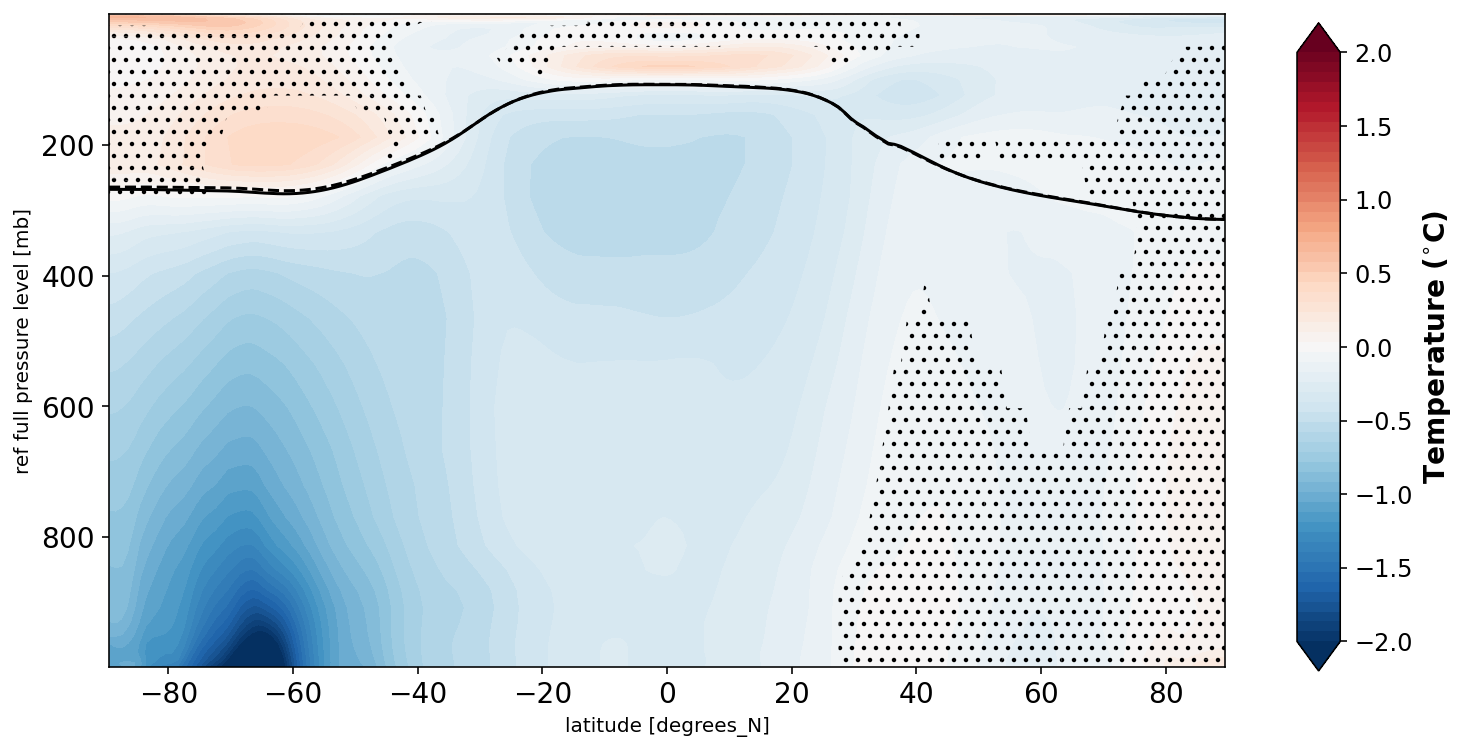

In [ ]:
%%time

fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_temp = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_temp = esm4_diff_temp_ant5.temp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-2,vmax=2,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_temp = plt.colorbar(cbar_zm_temp, cax=cax_zm_temp, ticks=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2], orientation="vertical")
cbr_zm_temp.set_label(label='Temperature ($^{\circ}$C)', fontsize=14, weight='bold')
cbr_zm_temp.ax.tick_params(labelsize='large')


## plots
esm4_diff_temp_ant5.temp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-2,vmax=2,
                                             cmap='RdBu_r', 
                                             extend='both',levels=60,add_colorbar=False)
esm4_ant5_ptp_last20.ptp.mean(dim='lon').plot(ax=ax0,color='k',
                                      linestyle='-',
                                      yincrease=False)
esm4_piC_ptp_ave.ptp.mean(dim='lon').plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)

ax0.xaxis.set_tick_params(labelsize=14)
ax0.yaxis.set_tick_params(labelsize=14)

## hatching for regions > 90% CI
esm4_ant5_lt_1p64_std_temp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

plt.savefig('esm4_zm_temp_ant5_90_CI.pdf',dpi=600)

CPU times: user 1min 39s, sys: 2min 2s, total: 3min 41s
Wall time: 2min 2s


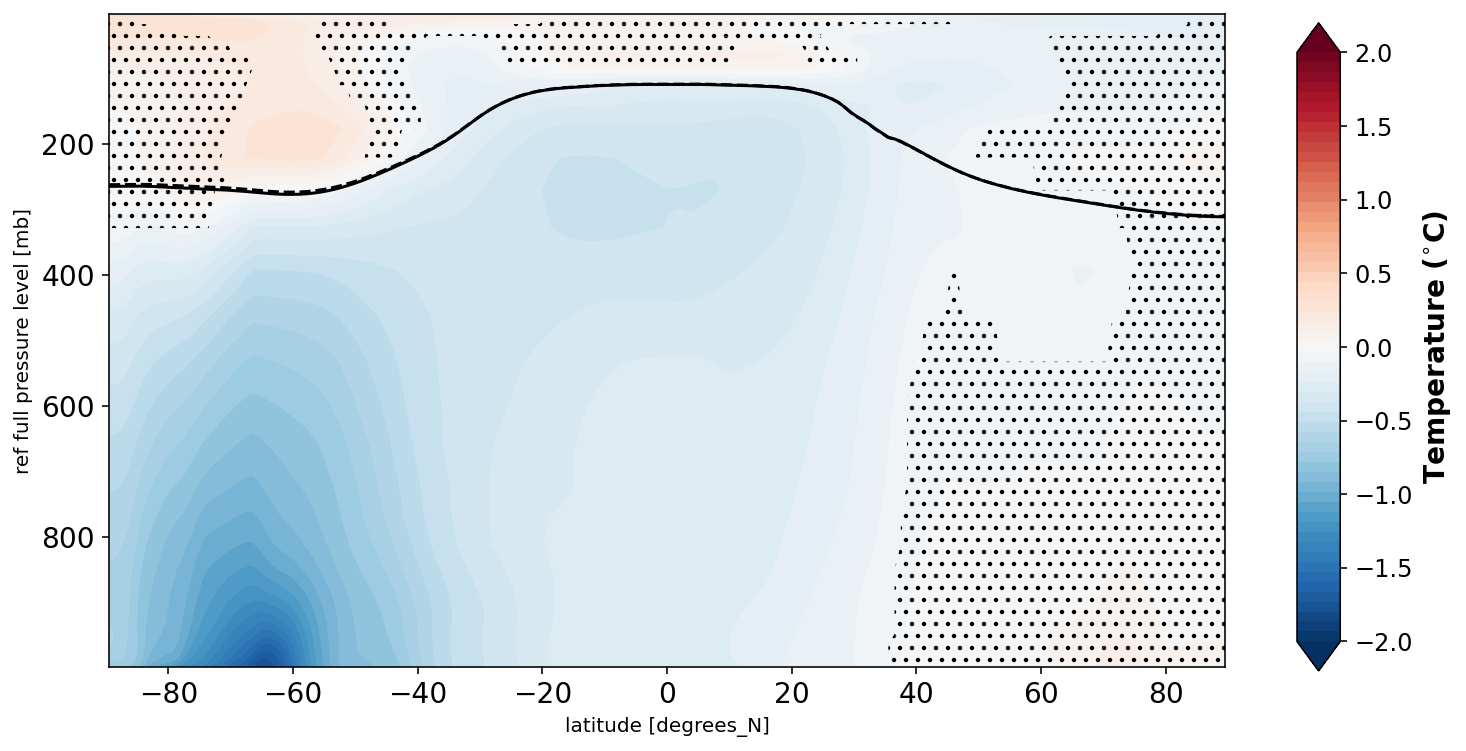

In [93]:
%%time

fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_temp = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_temp = cm4_diff_temp_ens.temp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-2,vmax=2,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_temp = plt.colorbar(cbar_zm_temp, cax=cax_zm_temp, ticks=[-2,-1.5,-1,-0.5,0,0.5,1,1.5,2], orientation="vertical")
cbr_zm_temp.set_label(label='Temperature ($^{\circ}$C)', fontsize=14, weight='bold')
cbr_zm_temp.ax.tick_params(labelsize='large')


## plots
cm4_diff_temp_ens.temp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-2,vmax=2,
                                             cmap='RdBu_r', 
                                             extend='both',levels=60,add_colorbar=False)
cm4_ant_ptp_ens_ave.ptp.mean(dim='lon').plot(ax=ax0,color='k',
                                      linestyle='-',
                                      yincrease=False)
cm4_piC_ptp_ave.ptp.mean(dim='lon').plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)


ax0.xaxis.set_tick_params(labelsize=14)
ax0.yaxis.set_tick_params(labelsize=14)

## hatching for regions > 90% CI
cm4_ens_lt_1p64_std_temp_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

plt.savefig('cm4_zm_temp_ens_90_CI.pdf',dpi=600)

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/xarray/plot/plot.py:1415: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


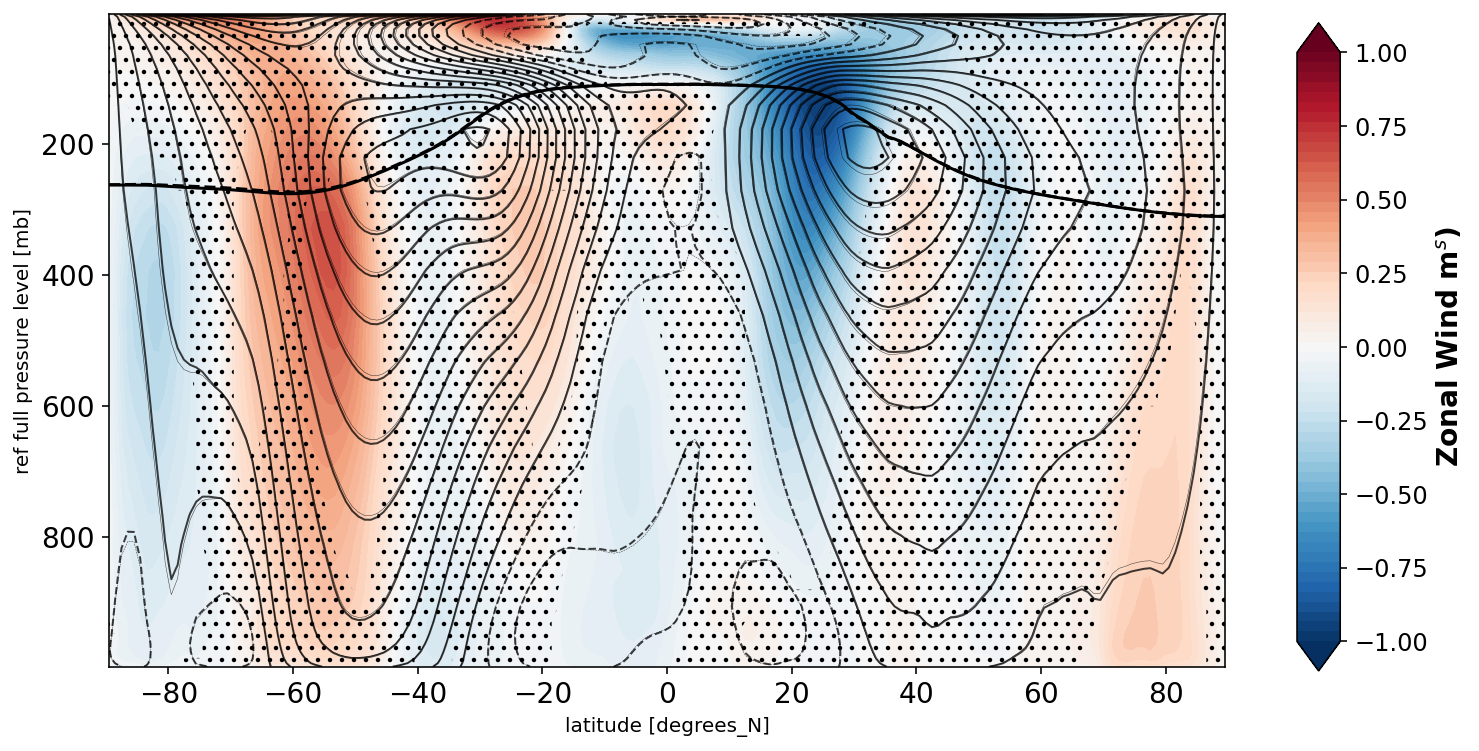

In [53]:
fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_u = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_u = cm4_ant5_u_diff.ucomp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-1,vmax=1,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_u = plt.colorbar(cbar_zm_u, cax=cax_zm_u, ticks=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1], orientation="vertical")
cbr_zm_u.set_label(label='Zonal Wind m$^{s}$)', fontsize=14, weight='bold')
cbr_zm_u.ax.tick_params(labelsize='large')

## plots
cm4_ant5_u_diff.ucomp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-1,vmax=1,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cm4_ant5_ptp_last20.ptp.mean(dim='lon').plot(ax=ax0,color='k',
                                      linestyle='-',
                                      yincrease=False)
cm4_piC_ptp_ave.ptp.mean(dim='lon').plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)


## hatching for regions > 90% CI
cm4_ant5_lt_1p64_std_u_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

### add mean-state contours over
cm4_piC_u_ave.mean(dim='time').ucomp.mean(dim='lon').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=0.25,alpha=0.75
                                                              )
cm4_ant5_u.mean(dim='time').ucomp.mean(dim='lon').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75,linestyle='--'
                                                              )


ax0.xaxis.set_tick_params(labelsize=14)
ax0.yaxis.set_tick_params(labelsize=14)

plt.savefig('cm4_zm_u_ant5_90_CI.pdf',dpi=600)

/nbhome/Rebecca.Beadling/miniconda/envs/acc/lib/python3.9/site-packages/xarray/plot/plot.py:1415: UserWarning: The following kwargs were not used by contour: 'linestyle'
  primitive = ax.contour(x, y, z, **kwargs)


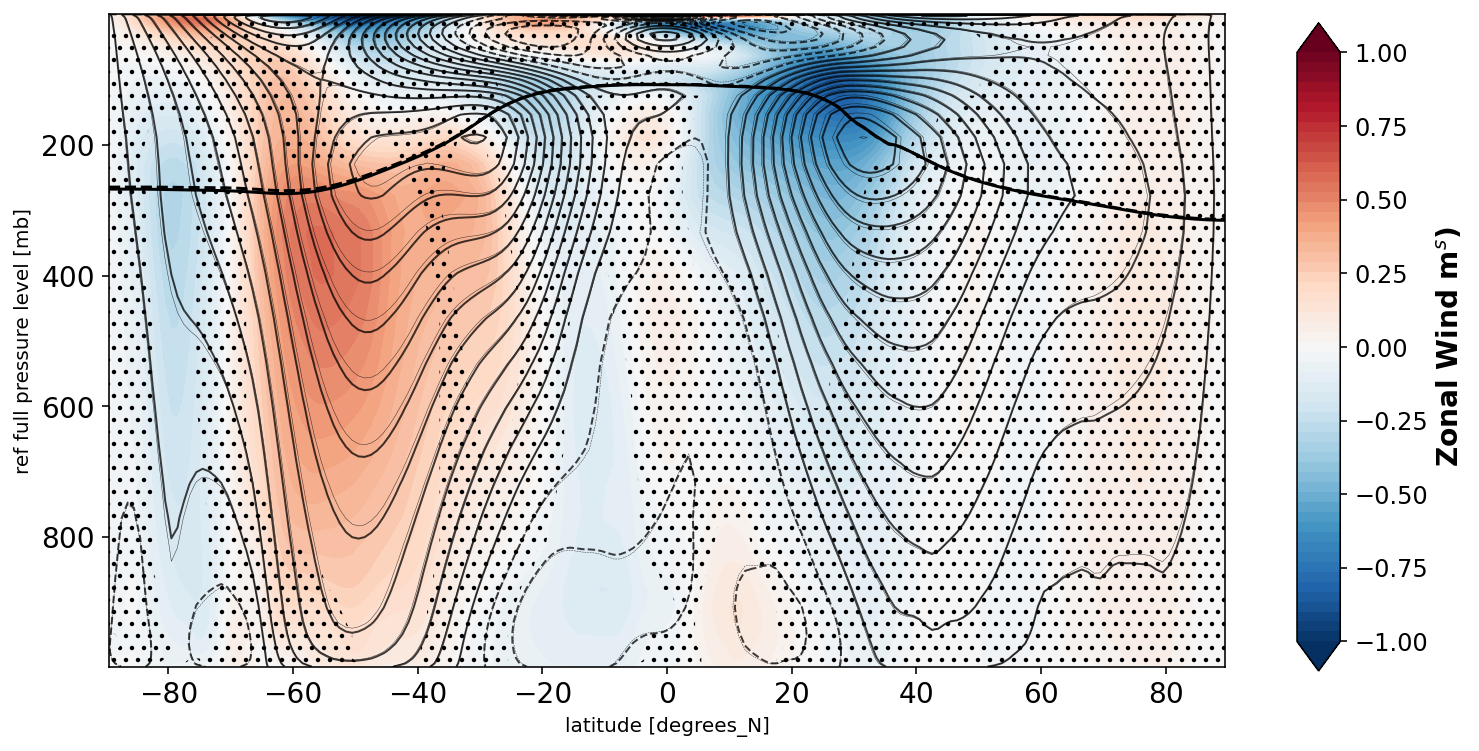

In [66]:
fig, ax0 = plt.subplots(figsize=(10,6))
## add custom colorbar for temp
cax_zm_u = fig.add_axes([0.95, 0.12, 0.03, 0.75])
cbar_zm_u = esm4_ant_u_diff_ens_ave.ucomp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-1,vmax=1,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
cbr_zm_u = plt.colorbar(cbar_zm_u, cax=cax_zm_u, ticks=[-1,-0.75,-0.5,-0.25,0,0.25,0.5,0.75,1], orientation="vertical")
cbr_zm_u.set_label(label='Zonal Wind m$^{s}$)', fontsize=14, weight='bold')
cbr_zm_u.ax.tick_params(labelsize='large')

## plots
esm4_ant_u_diff_ens_ave.ucomp.mean(dim='lon').plot.contourf(ax=ax0,yincrease=False,
                                             vmin=-1,vmax=1,
                                             cmap='RdBu_r', 
                                             extend='both',
                                             levels=60,
                                             add_colorbar=False)
esm4_ant_ptp_ens_ave.ptp.mean(dim='lon').plot(ax=ax0,color='k',
                                      linestyle='-',
                                      yincrease=False)
esm4_piC_ptp_ave.ptp.mean(dim='lon').plot(color='k',ax=ax0,
                                      linestyle='--',yincrease=False)


## hatching for regions > 90% CI
esm4_ens_lt_1p64_std_u_zm.plot.contourf(ax=ax0, hatches=['..'],cmap=plt.get_cmap('gray'),
                            alpha=0, add_colorbar=False,
                                        yincrease=False)

### add mean-state contours over
esm4_piC_u_ave.mean(dim='time').ucomp.mean(dim='lon').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=0.25,alpha=0.75
                                                              )
esm4_ant_u_ens_ave.mean(dim='time').ucomp.mean(dim='lon').plot.contour(ax=ax0,yincrease=False,
                                                              levels=30, 
                                                              vmin=-36, 
                                                              vmax=36,
                                                              colors='k',
                                                              linewidths=1,alpha=0.75,linestyle='--'
                                                              )


ax0.xaxis.set_tick_params(labelsize=14)
ax0.yaxis.set_tick_params(labelsize=14)

plt.savefig('esm4_zm_u_ens_90_CI.pdf',dpi=600)

## tdt dyn plots

Text(0.5, 1.0, '')

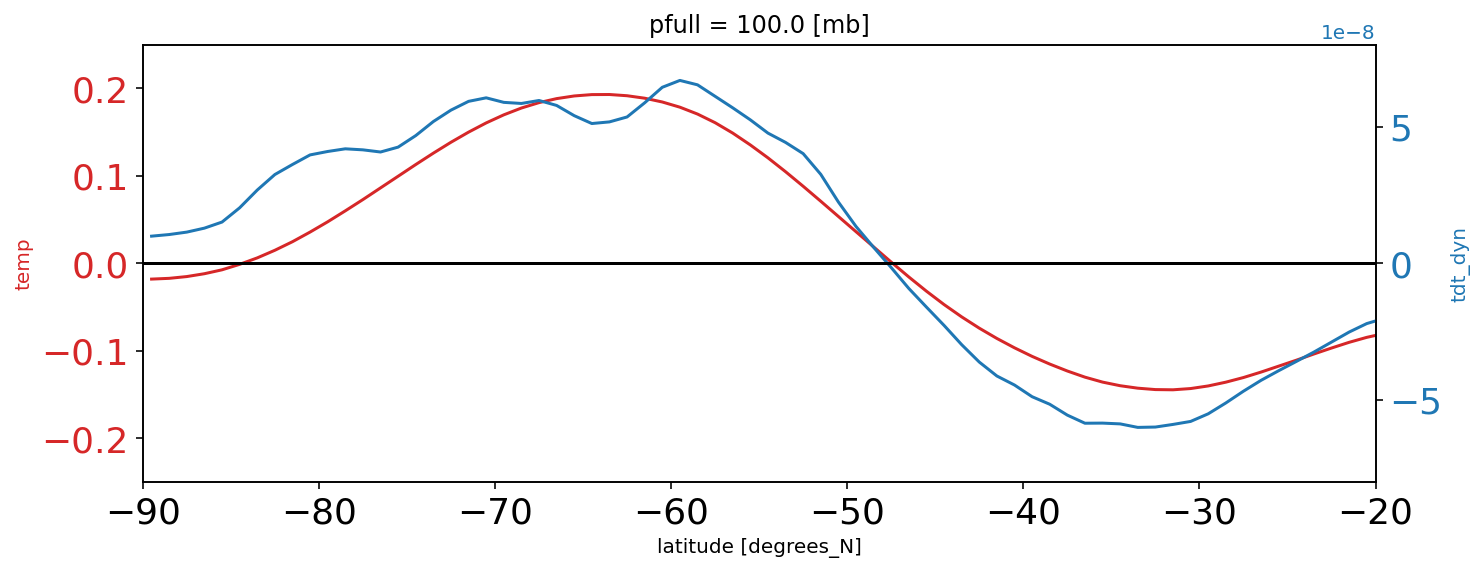

In [76]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.set_xlabel('latitude')
ax1.set_ylabel('tdt_dyn (K s-1)', color='tab:red')
esm4_diff_temp_ens.sel(pfull=100,method='nearest').temp.mean(dim='lon').plot(ax=ax1, 
                                                                                    color='tab:red',
                                                                                    label='ESM4 temp')

ax1.axhline(0)
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temperature (C)', color='tab:blue')  # we already handled the x-label with ax1
esm4_ant_tdt_dyn_diff_ens_ave.sel(pfull=100,method='nearest').tdt_dyn.mean(dim='lon').plot(ax=ax2, color='tab:blue',label='ESM4 tdt_dyn')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## add legends
#ax1.legend(loc=0,fontsize=20)
#ax2.legend(loc=0,fontsize=20)
## add horizontal zero lines
ax1.axhline(0, color='k')
ax2.axhline(0, color='k')

## set xlimits to only show extra-tropics
## and set ylimits
ax1.set_xlim(-90,-20)
ax2.set_xlim(-90,-20)
ax1.set_ylim(-0.25,0.25)
ax2.set_ylim(-8e-8,8e-8)

## set label sizes on axes
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

plt.title('')

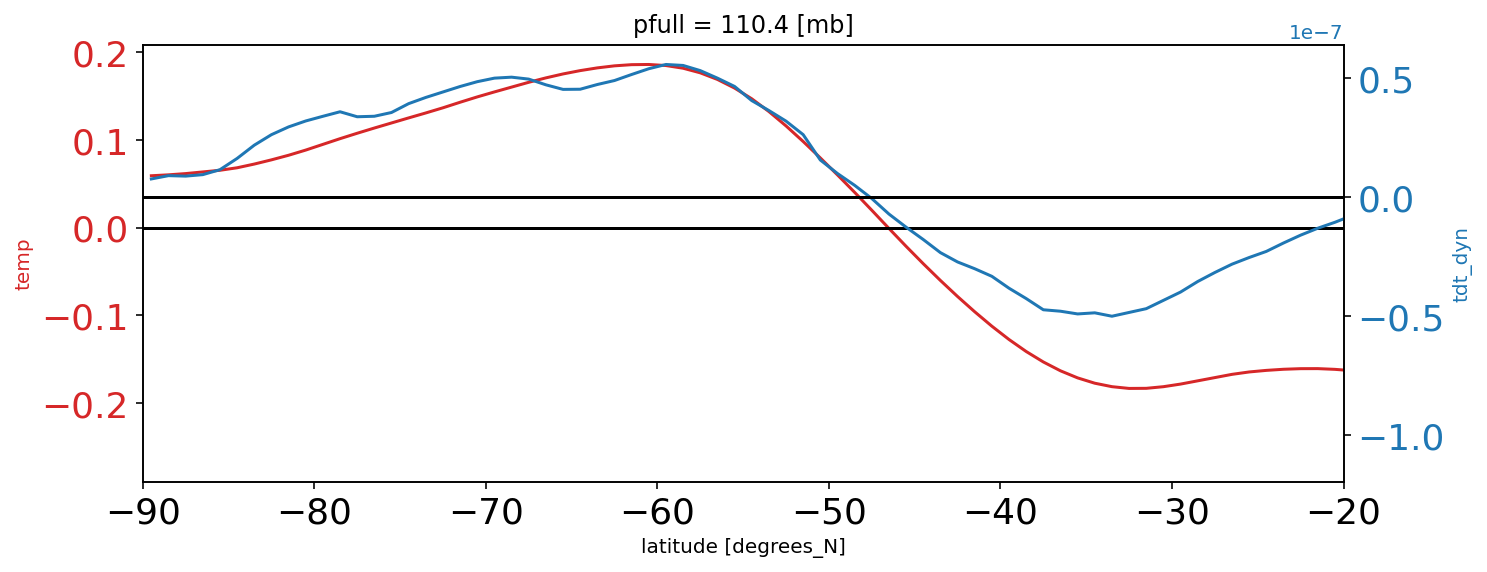

In [82]:
fig, ax1 = plt.subplots(figsize=(10,4))

ax1.set_xlabel('latitude')
ax1.set_ylabel('tdt_dyn (K s-1)', color='tab:red')
cm4_diff_temp_ens.sel(pfull=100,method='nearest').temp.mean(dim='lon').plot(ax=ax1, 
                                                                                    color='tab:red',
                                                                                    label='cm4 temp')

ax1.axhline(0)
ax1.tick_params(axis='y', labelcolor='tab:red')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel('Temperature (C)', color='tab:blue')  # we already handled the x-label with ax1
cm4_ant_tdt_dyn_diff_ens_ave.sel(pfull=100,method='nearest').tdt_dyn.mean(dim='lon').plot(ax=ax2, color='tab:blue',label='cm4 tdt_dyn')
ax2.tick_params(axis='y', labelcolor='tab:blue')

fig.tight_layout()  # otherwise the right y-label is slightly clipped

## add legends
#ax1.legend(loc=0,fontsize=20)
#ax2.legend(loc=0,fontsize=20)
## add horizontal zero lines
ax1.axhline(0, color='k')
ax2.axhline(0, color='k')

## set xlimits to only show extra-tropics
## and set ylimits
ax1.set_xlim(-90,-20)
ax2.set_xlim(-90,-20)
#ax1.set_ylim(-0.25,0.25)
#ax2.set_ylim(-8e-8,8e-8)

## set label sizes on axes
ax1.xaxis.set_tick_params(labelsize=18)
ax1.yaxis.set_tick_params(labelsize=18)
ax2.yaxis.set_tick_params(labelsize=18)

plt.title('')

plt.savefig('cm4_temp_tdt_dyn_100hpa.pdf',dpi=600)